<a href="https://colab.research.google.com/github/siddharthgautam04/npl-webinar/blob/main/NLP_Webinar_Day_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import pandas as pd

In [ ]:
df = pd.read_table('spam.tsv')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
df['message'][2]

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s'

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import re
from textblob import Word
df['message'] = df['message'].apply(lambda x:x.lower())
df['message'] = df['message'].apply(lambda x: re.sub(r'[^\w\s]','',x))
df['message'] = df['message'].apply(lambda x:" ".join([Word(x).lemmatize() for x in x.split()]))

In [ ]:
#can't = cannot

In [ ]:
df

,label,message,length,punct
0,ham,go until jurong point crazy available only in ...,111,9
1,ham,ok lar joking wif u oni,29,6
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155,6
3,ham,u dun say so early hor u c already then say,49,6
4,ham,nah i dont think he go to usf he life around h...,61,2
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,160,8
5568,ham,will ü b going to esplanade fr home,36,1
5569,ham,pity wa in mood for that soany other suggestion,57,7
5570,ham,the guy did some bitching but i acted like id ...,125,1


In [ ]:
x = df.iloc[:,1].values
y = df.iloc[:,0].values
print(x)

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'
 'ok lar joking wif u oni'
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s'
 ... 'pity wa in mood for that soany other suggestion'
 'the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to u for free'
 'rofl it true to it name']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state =0 )

In [ ]:
x_train.shape

(3900,)

In [ ]:
x_test.shape

(1672,)

In [ ]:
# Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
train_test_split?

tfidf_vectorizer = TfidfVectorizer()

x_train_idf = tfidf_vectorizer.fit_transform(x_train)
x_train_idf

x_train_idf.shape

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#model = MultinomialNB()

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Pipelining in SKlearn

# 1. Sklearn only accepts numericals as inputs
# 2. TFIDF Vectorizer
# 3. Fit the model

# Pipeline = Step 2 + Step 3

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
text_model = Pipeline([('tfidf',TfidfVectorizer()),
                       ('model',MultinomialNB())])


# Method ()
# [] - List
# () - Tuple
# () - Sub-method

In [ ]:
text_model = Pipeline([('tfidf',TfidfVectorizer()),
                       ('model',SVC())])

In [ ]:
text_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', d

In [ ]:
y_pred = text_model.predict(x_test)

In [ ]:
y_pred # Predicted output

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
y_test # Real Output

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
# Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# Classification Algorithm

In [ ]:
accuracy_score(y_test,y_pred)*100

# Accuracy isnt a good evaluation technique for imbalanced dataset

98.20574162679426

In [ ]:
confusion_matrix(y_test,y_pred)    # Spam : 220 , Ham = 1450 Total: 1670

array([[1450,    1],
       [  29,  192]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1451
        spam       0.99      0.87      0.93       221

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [ ]:
text_model.predict(['Hi How are you?'])

array(['ham'], dtype=object)

In [ ]:
#Error
text_model.predict(['Congratulations. You are selected as a winner. You won a lottery. Message WON to 8874837 for getting your prize. Congratulations again'])

array(['spam'], dtype=object)

In [ ]:
text_model.predict(['free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s'])

array(['spam'], dtype=object)

In [ ]:
# 2 Methods: 
# 1. Fine Tune - parameters of Tfidf Vectorizer
# 2. Change your Algorithm (Decision Tree, SVM)


In [ ]:
# AutoML

In [ ]:
!pip install autoviml

     |████████████████████████████████| 102kB 2.2MB/s 
     |████████████████████████████████| 64.7MB 60kB/s 
     |████████████████████████████████| 133kB 47.5MB/s 


In [ ]:
df

,label,message,length,punct
0,ham,go until jurong point crazy available only in ...,111,9
1,ham,ok lar joking wif u oni,29,6
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155,6
3,ham,u dun say so early hor u c already then say,49,6
4,ham,nah i dont think he go to usf he life around h...,61,2
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,160,8
5568,ham,will ü b going to esplanade fr home,36,1
5569,ham,pity wa in mood for that soany other suggestion,57,7
5570,ham,the guy did some bitching but i acted like id ...,125,1


In [ ]:
x

array(['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
       'ok lar joking wif u oni',
       'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s',
       ..., 'pity wa in mood for that soany other suggestion',
       'the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to u for free',
       'rofl it true to it name'], dtype=object)

In [ ]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
from autoviml.Auto_NLP import Auto_NLP

In [ ]:
Auto_NLP?

In [ ]:
# nlp_column = DataFrame containing message column
# train, test will contain the whole dataframe
# target = label column
# score_type = balanced_accuracy


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the dataframe
train,test = train_test_split(df,test_size=0.3,random_state = 0)
train

,label,message,length,punct
4380,ham,how are you just checking up on you,36,1
3887,ham,same im at my great aunt anniversary party in ...,63,2
4755,ham,ok lor or u wan me go look 4 u,34,4
2707,ham,s now only i took tablet reaction morning only,50,2
4747,ham,orh i tot u say she now still dun believe,42,1
...,...,...,...,...
4931,spam,hi the sexychat girl are waiting for you to te...,124,3
3264,ham,so u gonna get deus ex,23,1
1653,spam,for ur chance to win a 250 cash every wk txt a...,122,9
2607,ham,r u sam p in eachother if we meet we can go 2 ...,56,2


In [ ]:
nlp_column = 'message'
target = 'label'


Auto NLP processing on NLP Column: message
Shape of Train Data: 3900 rows
    Shape of Test Data: 1672 rows


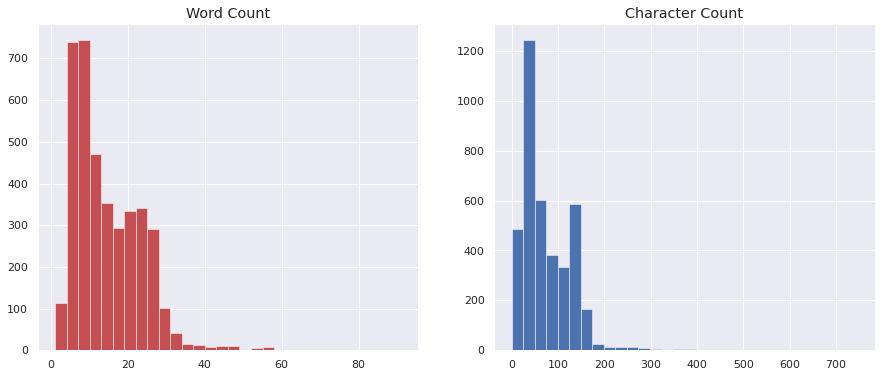

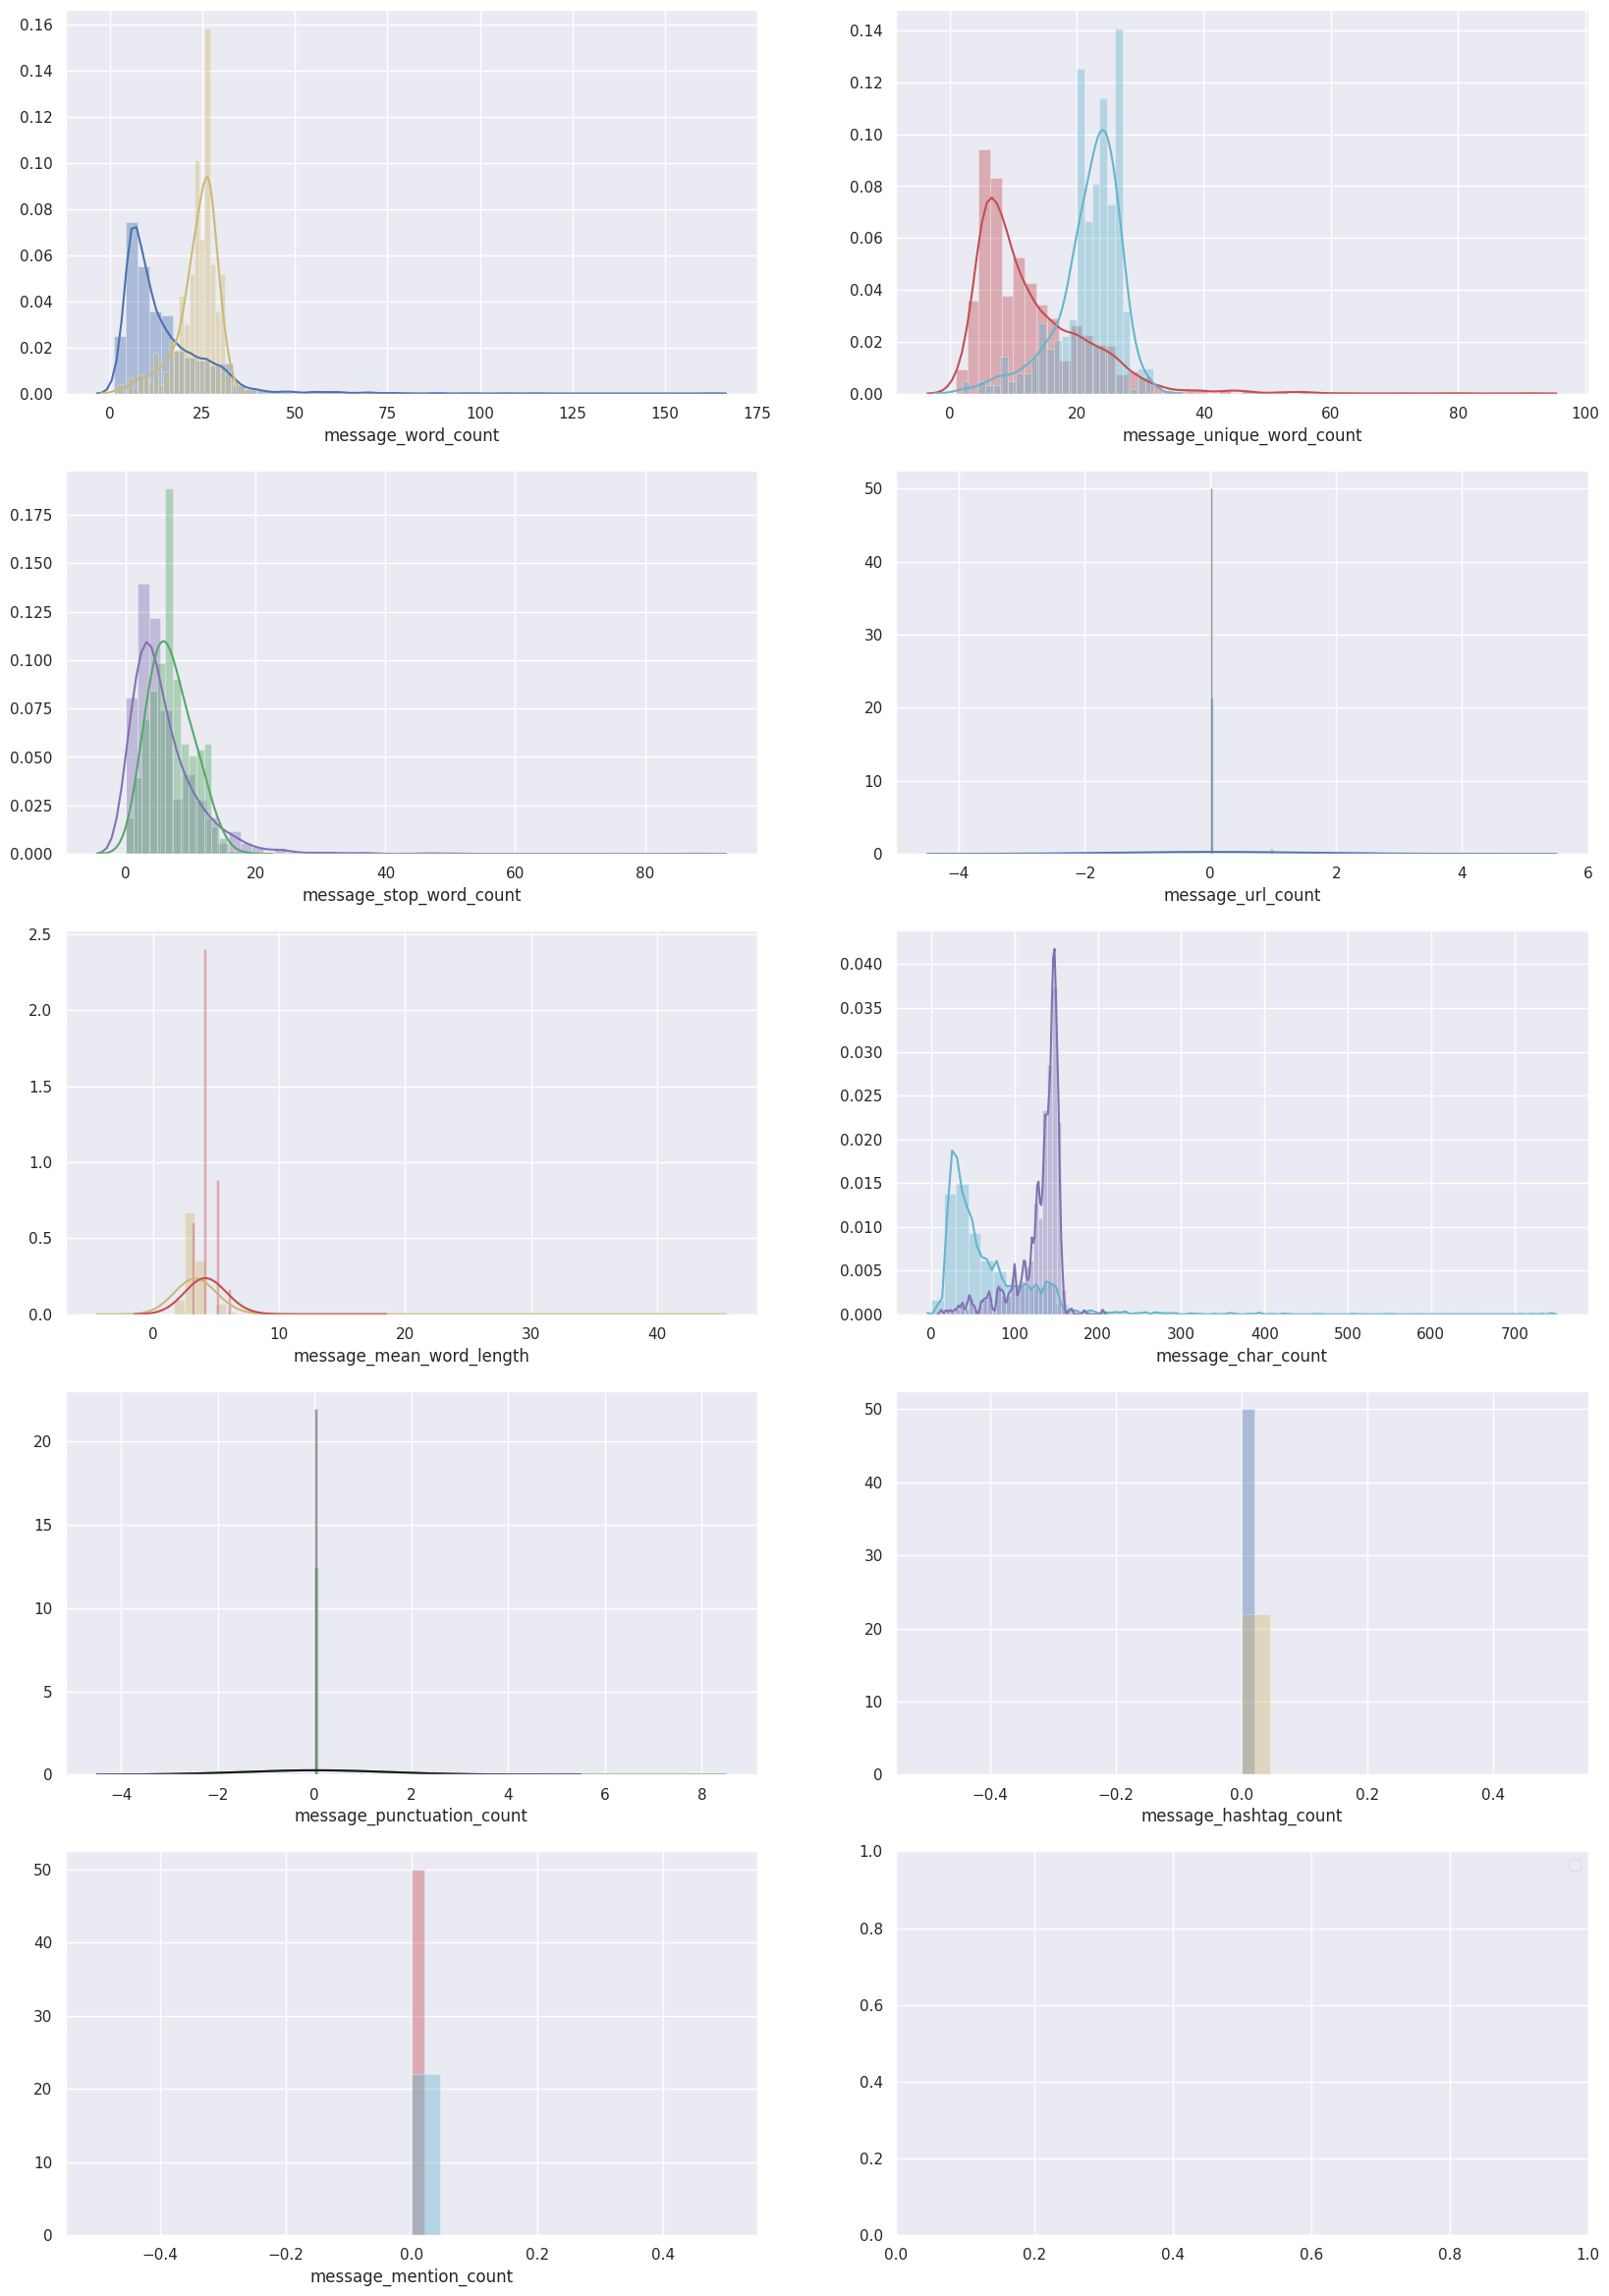

    Added 9 summary columns for counts of words and characters in each row
    Cleaning text in message before doing transformation...
Cleaning text in Train data. This will take a long time for large >100K data sets...
    Time Taken for Expanding text in Train data = 0 seconds
        Time Taken for Processing text in Train data = 6 seconds
            Time Taken for Stopword removal in Train data = 1 seconds
    Cleaning text in message before doing transformation...
Cleaning text in Test data. This will take a long time for large >100K data sets...
    Time Taken for Expanding text in Test data = 0 seconds
        Time Taken for Processing text in Test data = 2 seconds
            Time Taken for Stopword removal in Test data = 1 seconds
Train and Test data Text cleaning completed. Time taken = 3 seconds
    A U T O - N L P   P R O C E S S I N G  O N   N L P   C O L U M N = message 
#################################################################################
Generating new feat

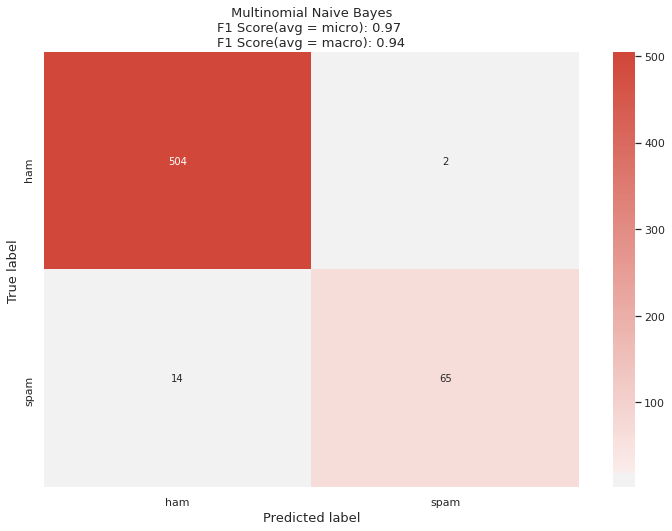

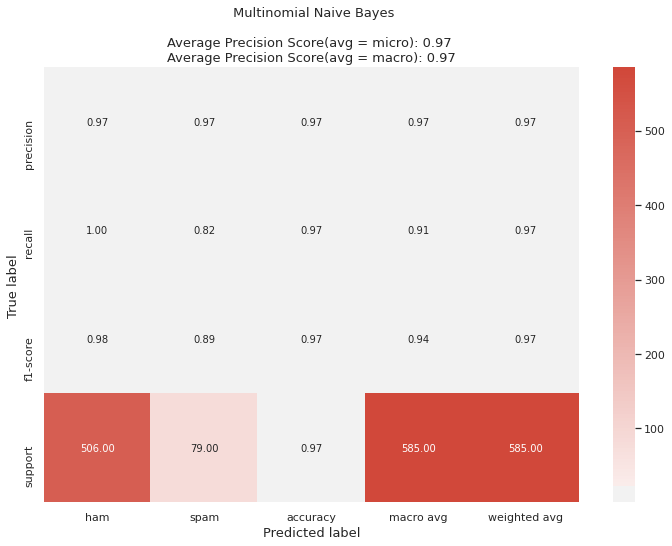

Training Pipeline on full Train data. This will take time...
    Time taken to train Pipeline on full Train shape ((3900,)) and test on ((1672, 13)) = 0.27 seconds
Time taken for Auto_NLP = 0.4 minutes
#########          A U T O   N L P  C O M P L E T E D    ###############################


In [ ]:
train_nlp,test_nlp,nlp_transformer,preds = Auto_NLP(nlp_column, train, test, target, score_type='balanced_accuracy',
         modeltype='Classification', top_num_features=200, verbose=2, build_model=True)

In [ ]:
nlp_transformer

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.05,
                                 max_features=8691, min_df=2,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents='unicode',
                                 token_pattern='\\w{1,}', tokenizer=None,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=0.29762249870394397, class_prior=None,
                               fit_prior=True))],
         verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
y_pred = nlp_transformer.predict(test[nlp_column])

In [ ]:
accuracy_score(y_test,y_pred)

0.9814593301435407

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1451
        spam       0.98      0.87      0.93       221

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [ ]:
confusion_matrix(y_test,y_pred)

array([[1448,    3],
       [  28,  193]])

In [ ]:
sentence = ' This mobile phone is good'

In [ ]:
from textblob import TextBlob

In [ ]:
blob = TextBlob(sentence)

In [ ]:
blob.ngrams(1)

[WordList(['This']),
 WordList(['mobile']),
 WordList(['phone']),
 WordList(['is']),
 WordList(['good'])]

In [ ]:
# Most


# 1. Linear Regression
# 2. Logistic Regression for Binary Classification
# 3. XGBoost
# 4. DecisionTree and Random Forest
# 5. Neural Network -ANN, CNN, LSTM , RNN 
# 6. SVM - Support Vector Machine
# 7. Naive Bayes

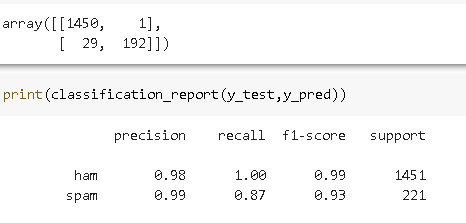

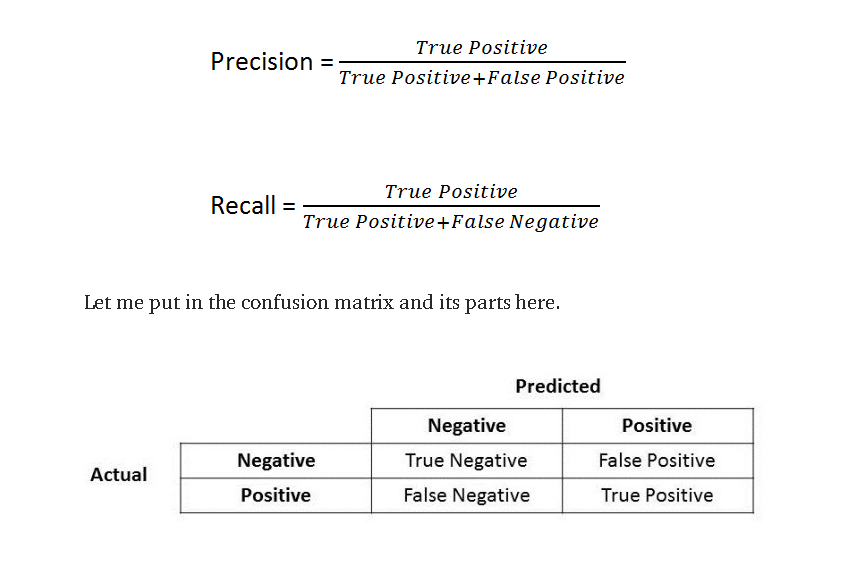